## Task 1 (예습)
Read class notes in CS229

- http://cs229.stanford.edu/syllabus-spring2020.html

Neural networks

- http://cs229.stanford.edu/notes2020spring/cs229-notes-deep_learning.pdf

Chain Rule
- https://namu.wiki/w/%EC%97%B0%EC%87%84%20%EB%B2%95%EC%B9%99

- https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/v/common-chain-rule-misunderstandings

- https://www.youtube.com/watch?v=NO3AqAaAE6o&list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7&index=30

Khan Academy
- https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/differentiating-vector-valued-functions/a/multivariable-chain-rule-simple-version

- https://www.youtube.com/playlist?list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7

- https://www.youtube.com/watch?v=_-02ze7tf08&list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7&index=21


In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
# Loading data file

infile = open('mnist.pkl','rb')
mnist_data = pickle.load(infile)
infile.close()

In [3]:
mnist_data.keys()

dict_keys(['Xtest', 'ytest', 'Xtrain', 'ytrain'])

In [4]:
mnist_data['Xtest'].shape

(1000, 400)

In [5]:
mnist_data['Xtrain'].shape

(4000, 400)

In [6]:
mnist_data['ytest']

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Data structure

* `mnist_data` is a dictionary with
  - keys: `Xtest`, `Xtrain`, `ytest`, `ytrain`
  - values:
      - value of `Xtest` is an np.array of size 1000 x 400
      - value of `Xtrain` is an np.array of size 4000 x 400
      - value of `ytest` is an np.array of size 1000 x 1
      - value of `ytrain` is an np.array of size 4000 x 1
* MNIST images are 20x20 images that is converted to length 400 row vector
* They are stacked as rows of `Xtest` and `Xtrain`
* The corresponding lable of each row is given in `ytest` and `ytrain`, respectively
* Example:
    - Label of `mnist_data['Xtest'][0,:]` is `mnist_data['ytest'][0]`
    - Label of `mnist_data['Xtrain'][2,:]` is `mnist_data['ytrain'][2]`

## Problem 1

Complete `dataLoader.py` as follows

* input: `data`, `label`, `batchsize` where
  - `data` is a `Xtest` or `Xtrain`, i.e., all data samples
  - `label` is a `ytest` or `ytrain`, i.e., all labels
  - `batchsize` is the batch size for SGD

* output: An iterator in the following form
  - `next(output)` gives a (sample_batch, label_batch) randomly sampled from `data` and `label` of size `batchsize`
  - Thus, the number of elements in output is
  \begin{align*}
   \text{output.size} = \left\lceil\frac{\text{total number of data}}{\text{batch size}}\right\rceil
  \end{align*}

In [7]:
# Run Problem 1
import dataLoader as DL
batchsize = 20

train_loader = DL.dataLoader(mnist_data['Xtrain'], mnist_data['ytrain'], batchsize)
test_loader = DL.dataLoader(mnist_data['Xtest'], mnist_data['ytest'], batchsize)

[   0    1    2 ... 3997 3998 3999]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

label is 7


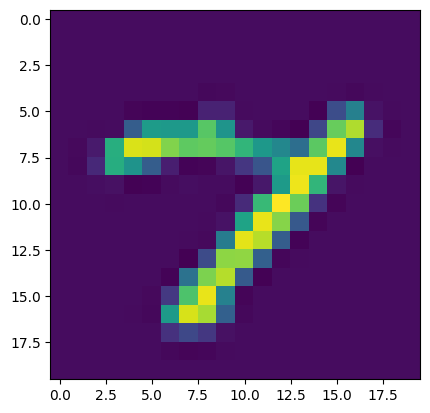

In [8]:
# Check that code works well
image, label = next(test_loader)

image_2D = image[0].reshape(20,20).transpose(1,0)
fig, ax = plt.subplots()
ax.imshow(image_2D)
print('label is {}'.format(label[0][0]))

## Problem 2

### Problem 2-1
Complete `NeuralNetwork.py` file as follows:

* Define a class `Network()`
  - Code `__init__()` function as follows:
      - inputs: `self`, `input_size`, `output_size`, `hidden_layers`
          - `input_size`: size of input, for example, $n$ if $x^{(i)}\in\mathbb{R}^n$
          - `output_size`: size of output, for example, $k$ if $h_\theta(x)\in\mathbb{R}^k$
          - `hidden_layers`: A *list* of hidden unit sizes for example, $a^{[1]}\in\mathbb{R}^{n_1}$, $a^{[2]}\in\mathbb{R}^{n_2}$, $a^{[3]}\in\mathbb{R}^{n_3}$, then `hidden_layers`=[$n_1$, $n_2$, $n_3$]
      - self variables:
          - self.num_layers: integer that stores the total number of layers as a function of `hidden_layers`
          - self.W: *Dictionary* of all the weights in the network initialized by Gaussian random variables
              - keys: $1,\ldots, r$, where $r$ is the number of layers
              - values: $W^{[\ell]}$, $\ell=1,\ldots, r$
              - for example: self.W[1] = $W^{[1]}\in \mathbb{R}^{n\times n_1}$ and $W^{[1]}$ is constructed by `np.random.randn(input_size,  hidden_layers[0])`
          - self.b: *Dictionary* of all the bias in the network initialized by Gaussian random variables
              - keys: $1,\ldots, r$, where $r$ is the number of layers
              - values: $b^{[\ell]}$, $\ell=1,\ldots, r$
              - for example: self.b[1] = $b^{[1]}\in \mathbb{R}^{1\times n_1}$ and $b^{[1]}$ is constructed by `np.random.randn(1,  hidden_layers[0])`
          - Complete dictionary `self.W` and `self.b` for all layers

### Problem 2-2      
  - Code a class function `forward(self, x)` as follows:
      - input: `x` which is a batch of samples, e.g.,
      
          `x, y = next(train_loader)`
      - Complete the self valiables: `self.Z` and `self.A` where
          - `self.Z` is a dictionary of *linear transformations* in each layer
          - `self.A` is a dictionary of *ReLU(Z)* in each layer
          - keys: 1,..., r, where r is the number of layers
          
          - value for key `1` in `self.Z` is
          \begin{align*}
              Z^{[1]} = X W^{[1]} + b^{[1]}
          \end{align*}
          i.e., `self.Z[1]`= $Z^{[1]}$
          - value for key `i=1,...,r` in `self.A` is
          \begin{align*}
              A^{[i]} = \text{ReLU}(Z^{[i]})
          \end{align*}
          - value for key `i=1,...,r` in `self.Z` is
          \begin{align*}
              Z^{[i]} = A^{[i-1]} W^{[i]} + b^{[i]}
          \end{align*}
      - output: Return $h_\theta(X)$
      
  - Useful supplementary functions
      - Complete `ReLU(x)`
          - input: Any np.array, but must work for 2D np.array
          - output: maximum of each entry in `x` and `0`, i.e., all negative elements in `x` are changed to `0`

In [9]:
import NeuralNetwork as NN

In [10]:
model = NN.Network(400, 10, [50, 20, 30])

In [11]:
# Check if coded correctly

for i in range(1,len(model.W)+1):
    print(model.W[i].shape)
    print(model.b[i].shape)



(400, 50)
(50,)
(50, 20)
(20,)
(20, 30)
(30,)
(30, 10)
(10,)


In [12]:
# Check that code works well
image, label = next(iter(train_loader))
out = model.forward(image)

In [13]:
for i in range(len(model.Z)):
    print(model.Z[i + 1].shape)
model.Z[3][19] # Z의 값은 크게 나오는 것이 당연하다. 왜냐하면 일단 내적 자체가 W를 곱한 값을 모두 더하고 거기에 B를 더해주는 과정이고 값이 0보다 작지 않을 경우 그대로 값을 내보내는 ReLU를 쓰기 때문

(20, 50)
(20, 20)
(20, 30)
(20, 10)


array([ 0.10845181, -0.01663342,  0.17302914,  0.45702705,  0.01665287,
       -0.18406138, -0.08573299, -0.29124388, -0.18199633,  0.10585103,
        0.18326346,  0.17522677, -0.17484375, -0.18702609,  0.03781816,
        0.03738475,  0.03629388,  0.08601708, -0.08541248,  0.05489096,
        0.00376296, -0.04929244, -0.06030521,  0.09481312,  0.13203446,
       -0.13195993,  0.22260195,  0.01816067, -0.13951837, -0.19531385])

In [14]:
print(model.W[1][0])


[ 0.05418579 -0.00194006 -0.11457019 -0.01869325 -0.12889049 -0.10406613
 -0.05697234 -0.03376954 -0.23413902 -0.31248454 -0.03236342  0.00248876
 -0.04470652  0.04792874  0.00938028 -0.19033883 -0.03833201  0.17433094
 -0.1578748   0.07269958 -0.06316353  0.12495614  0.13765413 -0.11761764
 -0.07640396 -0.06367075 -0.15022255  0.01194017  0.00840133  0.14506921
 -0.03718086 -0.1593369   0.06151116 -0.05505125 -0.0215205  -0.08501041
 -0.19284839  0.0281441   0.04307571 -0.11185526 -0.11847941 -0.12884639
  0.1576722  -0.05440296  0.03353347  0.00605763  0.1371882  -0.00433993
  0.14134053  0.01619607]


##이제부터는 역전파인데 정해진 형식 없어서 그냥 내 맘대로 할게요

In [15]:
model.backward(image, label)

In [16]:
np.sum(model.O[1])
model.O.shape

(20, 10)

In [17]:
model.db[2].shape


(1, 20)

In [22]:
dW_Mem = []
for i in range(1000):
    model.forward(image)
    dW_Mem.append(model.dW)
    model.backward(image, label)
    model.SGD()
    if i %100 == 0:

        print("loss : ",model.loss)


loss :  0.00023894531535475052
loss :  0.00022604562891035638
loss :  0.00021412069750946917
loss :  0.00020307519317895318
loss :  0.00019276392461146146
loss :  0.00018311374669515993
loss :  0.00017404845416949923
loss :  0.00016550343048129428
loss :  0.00015736590713806494
loss :  0.00014971544906838862


In [19]:
# for i in range(1, model.num_layers + 1):
#     print("{",i,"] ",model.dW[i])
np.all(model.dW[1] == 0)
model.W[1][200]
for i in range(1, len(model.delta)+1):
    print(model.delta[i].shape)

(20, 50)
(20, 20)
(20, 30)
(20, 10)
